In [1]:
import os, sys
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
sys.path.insert(0, parent_dir)
curr_dir, parent_dir


('/home/am/Documents/Software Development/10_Academy Training/week-10/brent-data-analysis/notebooks',
 '/home/am/Documents/Software Development/10_Academy Training/week-10/brent-data-analysis')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
processed_data_path = "../data/BrentOilPrices.csv"

In [5]:
df_processed = pd.read_csv(processed_data_path)

In [6]:
df_processed.shape

(5015, 2)

In [7]:
from scripts.statistical_modeling import StatisticalModel

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [8]:
statistical_model = StatisticalModel(df_processed)


****************************************************************************************************

Checking for stationarity using ADF test.
ADF Statistic: -2.0440650928526902, 
p-value: 0.26759235678521454

****************************************************************************************************

Plotting ACF and PACF to determine AR and MA orders.


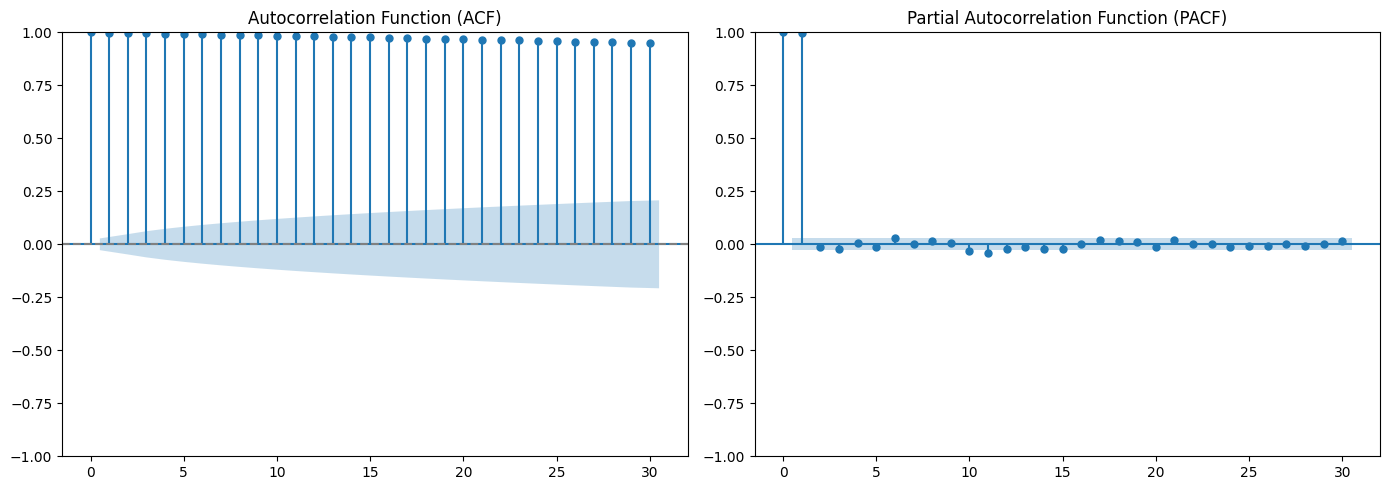


****************************************************************************************************

Fitting ARIMA model.

📊 ARIMA Performance:
✅ RMSE: 30.711112364363704
✅ MAE: 23.71951199040037
✅ R² Score: -1.0619509582805349


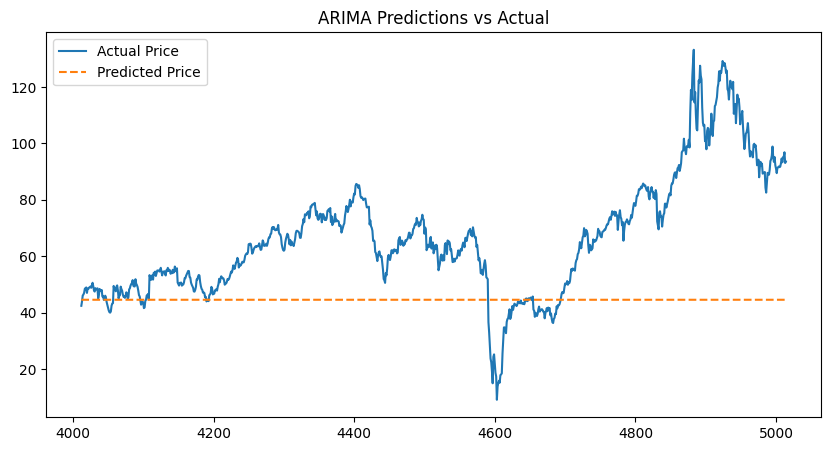

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4012
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7201.433
Date:                Sun, 23 Feb 2025   AIC                          14408.866
Time:                        16:38:37   BIC                          14427.757
Sample:                             0   HQIC                         14415.562
                               - 4012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1095      0.376      0.291      0.771      -0.627       0.847
ma.L1         -0.0780      0.377     -0.207      0.836      -0.817       0.661
sigma2         2.1233      0.025     84.234      0.0

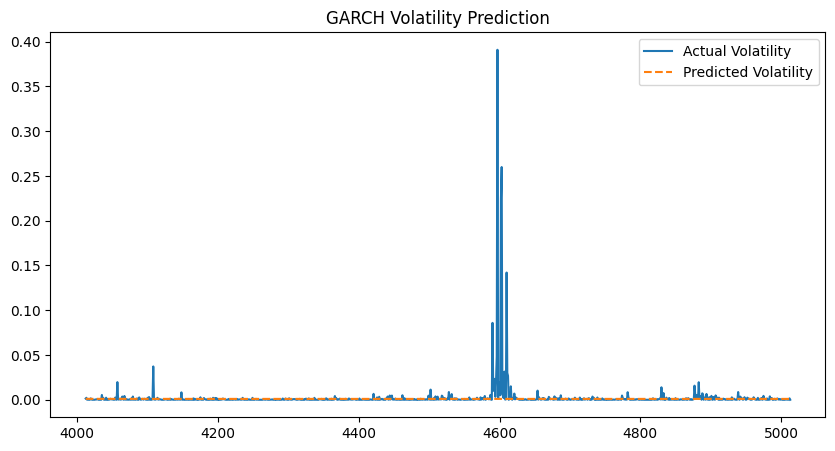

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8775.58
Distribution:                  Normal   AIC:                          -17543.2
Method:            Maximum Likelihood   BIC:                          -17518.0
                                        No. Observations:                 4011
Date:                Sun, Feb 23 2025   Df Residuals:                     4010
Time:                        16:38:37   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.2453e-04  4.220e-04      2.191  2.848e-02 [9.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics



📊 Bayesian Inference Performance:
✅ RMSE: 22.590534957506133
✅ MAE: 16.871353584913365
✅ R² Score: -0.11568159458694893


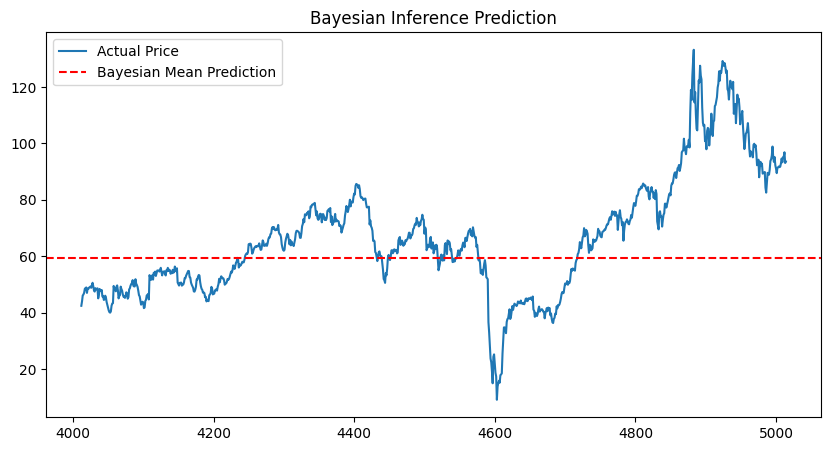

Performing Bayesian analysis using PYMC completed!

----------------------------------------------------------------------------------------------------


Posterior Summary:
<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    mu       (chain, draw) float64 58.6 59.96 58.78 59.21 ... 59.06 59.28 59.21
    sigma    (chain, draw) float64 33.22 32.19 33.3 32.51 ... 33.36 32.8 33.09
Attributes:
    created_at:                 2025-02-23T13:39:07.543730
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.6.1
    sampling_time:              7.254411220550537
    tuning_steps:               1000
         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     59.335  0.455  58.474   60.177      0.010    0.007    2045.0    1550.0   
sigma  32.964  0.324  32.363   33.570   

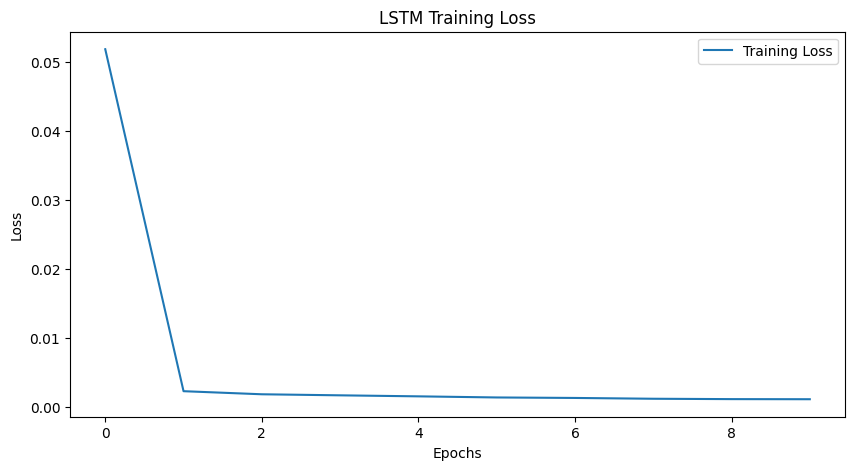

📊 LSTM Performance:
✅ RMSE: 3.070707551268744
✅ MAE: 2.0246387149577396
✅ R² Score: 0.9793901573992366


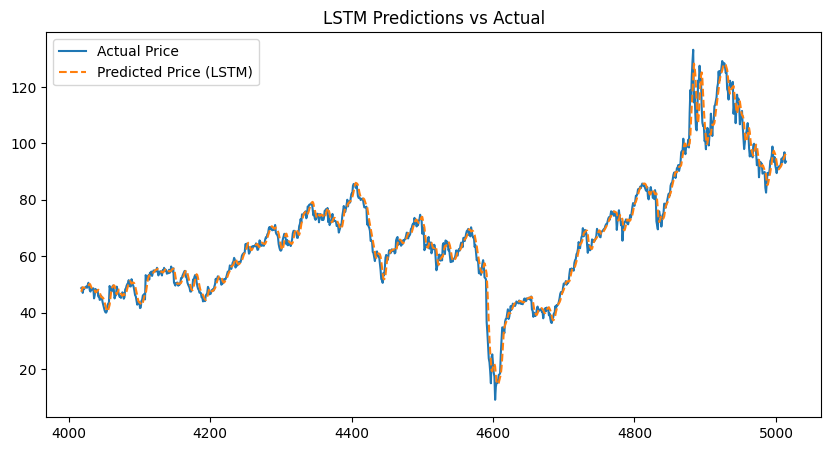


****************************************************************************************************

Comparing Model Performance


****************************************************************************************************

Fitting LSTM model.

Epoch 1/10, Loss: 0.05389198606740683
Epoch 2/10, Loss: 0.0023072402337566016
Epoch 3/10, Loss: 0.0019340884811244905
Epoch 4/10, Loss: 0.0016365592607762664
Epoch 5/10, Loss: 0.0015434339840430767
Epoch 6/10, Loss: 0.0015141141228377818
Epoch 7/10, Loss: 0.0013298293119296432
Epoch 8/10, Loss: 0.001323600931558758
Epoch 9/10, Loss: 0.001208350007655099
Epoch 10/10, Loss: 0.0011983597015496343


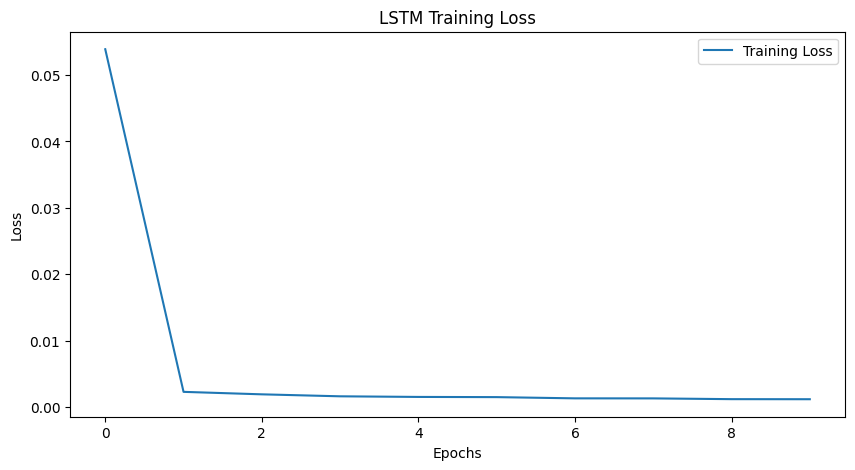

📊 LSTM Performance:
✅ RMSE: 3.3637936695832775
✅ MAE: 2.2293934440421483
✅ R² Score: 0.9752681582503049


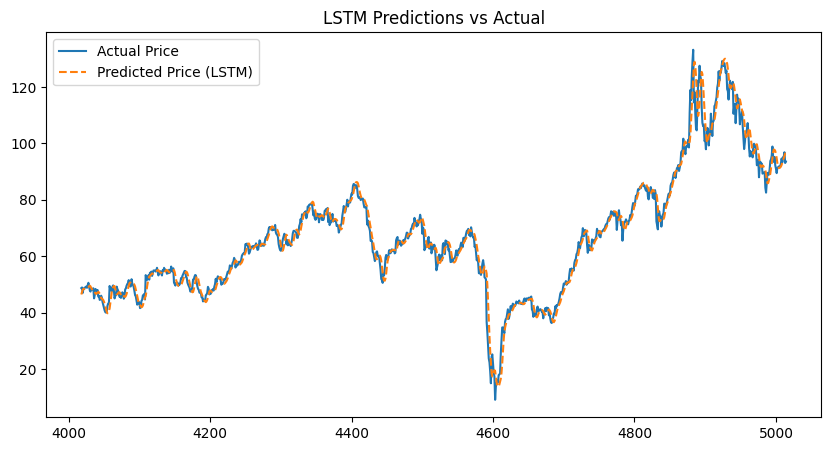

LSTM Performance Metrics:
RMSE: 3.3637936695832775
MAE: 2.2293934440421483
R² Score: 0.9752681582503049
             Model      RMSE       MAE  R² Score
             ARIMA 30.711112 23.719512 -1.061951
             GARCH  0.017522  0.002353 -0.004622
Bayesian Inference 23.234174 17.297332 -0.180162
              LSTM  3.363794  2.229393  0.975268

----------------------------------------------------------------------------------------------------

✅ Model with lowest RMSE and MAE is generally the best.
✅ Higher R² Score (closer to 1) indicates better model fit.



In [9]:
result = statistical_model.check_stationarity()
adf_statistic = result['ADF Statistic']
p_value = result['p-value']
print(f"ADF Statistic: {adf_statistic}, \np-value: {p_value}")

statistical_model.plot_acf_pacf()

statistical_model.fit_arima()

statistical_model.fit_garch()

trace = statistical_model.bayesian_inference()
# var_result = statistical_model.fit_var()
# markov_switching_result = statistical_model.fit_markov_switching_arima()

lstm_model, perf_metrics = statistical_model.fit_lstm(epochs=10, batch_size=32)


statistical_model.compare_models()
